In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn
import os
import requests
import json
import io

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib 
import zipfile 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
url_ny = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/New-York/en'
url_bos = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/Boston/en'

In [3]:
# Make sure the environmental variable works
puidata = os.getenv("PUIDATA")
if not puidata or puidata == 'nfshome/tm1722/PUIdata':
    puidata = '/nfshome/tm1722/PUIDATA'
    
os.environ["PUIDATA"] = puidata

In [4]:
# downloading the file

url_ny = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/New-York/en'
url_bos = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/Boston/en'
url_chi = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/Chicago/en'
url_la = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/Los-Angeles/en'
url_bal_wash = 'http://www.hassavocadoboard.com/excel/retail_volume_price/conventional/2018/Baltimore%7CWashington/en'

urllib.urlretrieve(url_ny, puidata + '/avocado_ny.xls') 
urllib.urlretrieve(url_bos, puidata + '/avocado_bos.xls') 
urllib.urlretrieve(url_chi, puidata + '/avocado_chi.xls') 
urllib.urlretrieve(url_la, puidata + '/avocado_la.xls') 
urllib.urlretrieve(url_bal_wash, puidata + '/avocado_bal_wash.xls') 

('/nfshome/tm1722/PUIdata/avocado_bal_wash.xls',
 <http.client.HTTPMessage at 0x7fc02526f9b0>)

In [6]:
# Futile attempt to read in in XLS files into pandas dataframes
avo_ny = pd.read_excel(puidata + '/avocado_ny.xls')

_locate_stream(Workbook): seen
    0  5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 
   20  2 


CompDocError: Workbook corruption: seen[2] == 4

In [7]:
# Apparently, it is a common problem with xls files. Had to open files using excel, save it to other xls files,
# and then manually upload them to my PUI data folder
avo_ny = pd.read_excel(puidata + '/avocado_ny1.xls')
avo_bos = pd.read_excel(puidata + '/avocado_bos1.xls')
avo_bal_wash =  pd.read_excel(puidata + '/avocado_bal_wash1.xls')
avo_chi =  pd.read_excel(puidata + '/avocado_chi1.xls')
avo_la =  pd.read_excel(puidata + '/avocado_la1.xls')


In [8]:
# Let's check out if the xls files imported correctly
avo_ny.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2018-09-09,1.35,1861984.34,49496.82,1022995.18,8669.01,780823.33,716134.67,61587.94,3100.72
1,2018-09-02,1.44,1650509.62,47941.03,1032497.69,10103.03,559967.87,511648.68,45754.75,2564.44
2,2018-08-26,1.32,1740157.07,54588.54,1158944.98,10523.56,516099.99,464228.85,49464.48,2406.66
3,2018-08-19,1.31,1664803.73,54452.44,868289.94,11289.32,730772.03,681905.54,46433.15,2433.34
4,2018-07-15,1.19,1994054.25,61572.88,1159805.06,672.00,772004.31,707791.91,61599.07,2613.33


In [9]:
# I want to create a bargraph of average yearly sales prices for 5 cities

In [10]:
# calculate and store average sales prices
ny_avg = avo_ny['AveragePrice'].mean()
bos_avg = avo_bos['AveragePrice'].mean()
bal_wash_avg = avo_bal_wash['AveragePrice'].mean()
chi_avg = avo_chi['AveragePrice'].mean()
la_avg = avo_la['AveragePrice'].mean()

In [11]:
# create a list of cities to be our x-axis
cities = ['New York', 'Boston', 'Baltimore/Washington', 'Chicago', 'Los Angeles']
cities

['New York', 'Boston', 'Baltimore/Washington', 'Chicago', 'Los Angeles']

In [12]:
# create a list of average sales prices to be our values for y-axis
Avg_Sales_Price = [ny_avg, bos_avg, bal_wash_avg, chi_avg, la_avg]
Avg_Sales_Price

[1.2946875, 1.288125, 1.3131249999999999, 1.37625, 1.0478124999999998]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


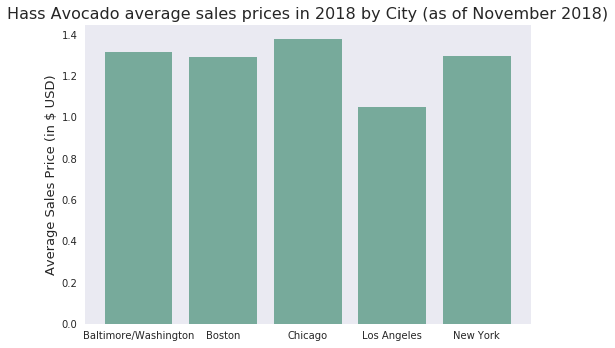

In [15]:
plt.bar(cities, Avg_Sales_Price, align='center', alpha=0.5, )
plt.ylabel('Average Sales Price (in $ USD)', fontsize=13)
plt.title('Hass Avocado average sales prices in 2018 by City (as of November 2018)', fontsize=16)
plt.grid(False)
 
plt.show()


Figure 1. 

Data from Hass Avocado Board's Retail Volume & Avocado Price for 2018 (http://www.hassavocadoboard.com/retail/volume-and-price-data)
 

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. Other varieties of avocados (e.g. greenskins) are not included.